In [1]:
import numpy as np
import json
import os 
from matplotlib import pyplot as plt 

LINE_WIDTH=3.5
FONT_SIZE = 45


base_dir = "./bandwidth"
file_list = os.listdir(base_dir)
print(file_list)

SCENARIOS = ["foot", "bicycle", "bus", "car", "tram", "train"]
data = {}
for s in SCENARIOS:
    data[s] = []

for file in file_list:
    if('json' in file):
        print(file)
        with open(os.path.join(base_dir,file)) as f:
            scenario = file.split('_')[1]
            json_data = json.load(f)
            bandwidth = json_data["trace"]
            data[scenario] = bandwidth

for key in data:
    print(key)
            
for i in range(len(SCENARIOS)):
    plt.figure(figsize=(18,10))#设置画布的尺寸

    # plot_range = [400,500]
    # plot_len = plot_range[1] - plot_range[0]
    plot_len = 80

    plt.plot(list(range(plot_len)), data[SCENARIOS[i]][0:plot_len], linewidth=LINE_WIDTH)

    # plt.title(f"{SCENARIOS[i]}", fontsize=30, horizontalalignment="center")
    #设置坐标标签标注和字体大小
    plt.xlabel("Time (s)",fontsize=FONT_SIZE)
    plt.ylabel("Bandwidth (Mbps)",fontsize=FONT_SIZE)

    #设置坐标刻度字体大小
    plt.xticks(fontsize=FONT_SIZE*0.8)
    plt.yticks(fontsize=FONT_SIZE*0.8)
    plt.ylim(0,70)
    plt.xlim(0,80)

    plt.savefig(f"./plots/{SCENARIOS[i]}.png",bbox_inches = 'tight')
    plt.show()


In [6]:
import numpy as np
import json
import os 
from matplotlib import pyplot as plt 
import pandas as pd

LINE_WIDTH=3.5
FONT_SIZE = 45

def is_trace(file_name):
    start = file_name.split('_')[0]
    if start == 'B':
        return True
    else:
        return False
    
    

DOWNLOAD_STATIC_DIR = "./5Gdataset/5G-production-dataset/Download/Static/"
DOWNLOAD_DRIVING_DIR = "./5Gdataset/5G-production-dataset/Download/Driving/"

download_static_traces = list(filter(is_trace, sorted(os.listdir(DOWNLOAD_STATIC_DIR))))
download_driving_traces = list(filter(is_trace, sorted(os.listdir(DOWNLOAD_DRIVING_DIR))))


# print(download_static_traces)
# print(download_driving_traces)


bandwidth_logs = []

df = pd.read_csv(os.path.join(DOWNLOAD_STATIC_DIR, download_static_traces[1]))
# df = pd.read_csv(os.path.join(DOWNLOAD_DRIVING_DIR, download_driving_traces[1]))

bandwidth = df["DL_bitrate"]/1024
for i in range(1, len(bandwidth)):
    if bandwidth[i] <= 0.1:
        bandwidth[i] = bandwidth[i-1]
        

output_file = "./5G_01.txt"
        
with open(output_file, "w+") as f:
    for d in bandwidth[9:500]:
        f.write(str(d)+'\n')

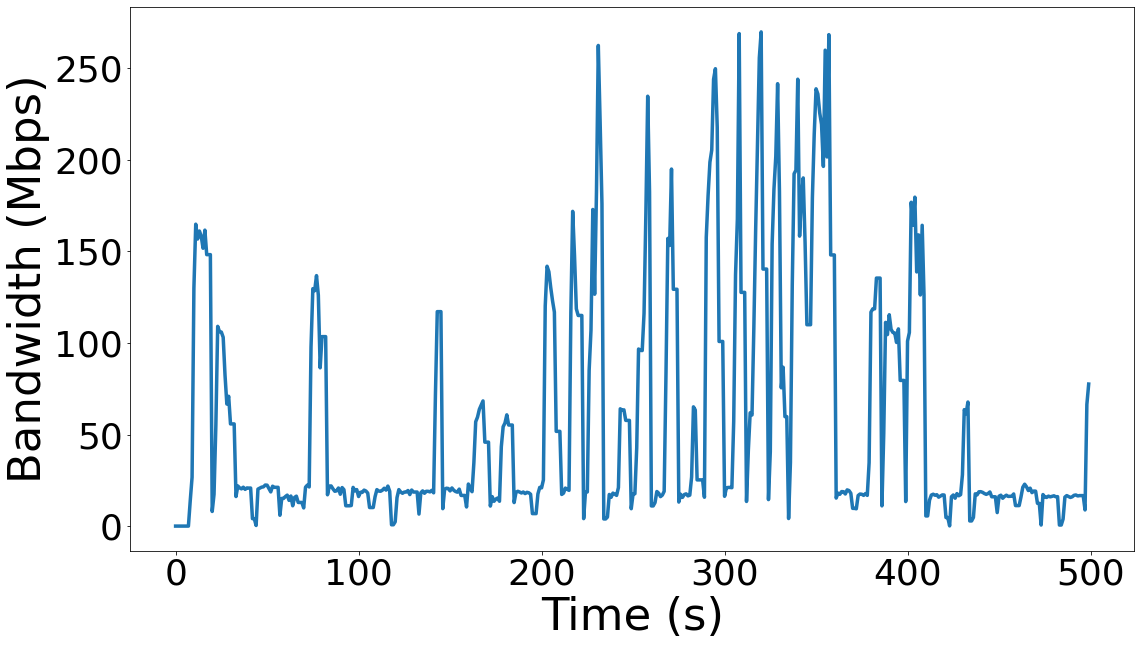

In [2]:
            
plt.figure(figsize=(18,10))#设置画布的尺寸

# plot_range = [400,500]
# plot_len = plot_range[1] - plot_range[0]
plot_len = 500

plt.plot(list(range(plot_len)), bandwidth[0:plot_len], linewidth=LINE_WIDTH)

# plt.title(f"{SCENARIOS[i]}", fontsize=30, horizontalalignment="center")
#设置坐标标签标注和字体大小
plt.xlabel("Time (s)",fontsize=FONT_SIZE)
plt.ylabel("Bandwidth (Mbps)",fontsize=FONT_SIZE)

#设置坐标刻度字体大小
plt.xticks(fontsize=FONT_SIZE*0.8)
plt.yticks(fontsize=FONT_SIZE*0.8)
# plt.ylim(0,70)
# plt.xlim(0,80)

# plt.savefig(f"./plots/{SCENARIOS[i]}.png",bbox_inches = 'tight')
plt.show()